In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#jupyter 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

### [실습] 카이제곱 검정

In [3]:
ds_com = pd.read_csv('/home/piai/Downloads/카이제곱.csv', engine = 'python')

In [9]:
ds_com['A'] =[18,1,8,7,10,9,10]
ds_com

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,1,2,1,1,1,25
2,8,14,3,2,3,8
3,7,5,4,3,1,10
4,10,5,9,2,1,2
5,9,9,5,7,1,1
6,10,4,4,3,1,7


In [13]:
from scipy.stats import chi2_contingency

#chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(ds_com)

#chi-sqaure test 결과 출력
print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree of freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))
print()
print('결론 : 유의수준 5%에서 각 제품에 대해 이미지에 대해 차이가 있다고 할 수 있다.')

chi-square test
chisq: 98.274
p-value: 0.000
degree of freedom: 30
expected value: 
[[11.   8.2  5.2  3.8  1.9  9.8]
 [ 8.5  6.4  4.1  3.   1.5  7.6]
 [10.5  7.8  5.   3.7  1.8  9.3]
 [ 8.3  6.2  3.9  2.9  1.4  7.3]
 [ 8.   6.   3.8  2.8  1.4  7.1]
 [ 8.8  6.6  4.2  3.1  1.5  7.8]
 [ 8.   6.   3.8  2.8  1.4  7.1]]

결론 : 유의수준 5%에서 각 제품에 대해 이미지에 대해 차이가 있다고 할 수 있다.


In [8]:
data = [[182,154],[213,138],[203,110]]
from scipy.stats import chi2_contingency
chi, pval, dof, expected = stats.chi2_contingency(data)
print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree of freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))
print()
print('결론 : 유의수준 5%에서 각 제품에 대해 이미지에 대해 차이가 있다고 할 수 있다.')

chi-square test
chisq: 7.878
p-value: 0.019
degree of freedom: 2
expected value: 
[[200.9 135.1]
 [209.9 141.1]
 [187.2 125.8]]

결론 : 유의수준 5%에서 각 제품에 대해 이미지에 대해 차이가 있다고 할 수 있다.


In [6]:
df = pd.DataFrame({[182,154],ㅔ, '반':[154,138,110]})
df

from scipy.stats import chi2_contingency

#chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)
print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree of freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))
print()
print('결론 : 유의수준 5%에서 각 제품에 대해 이미지에 대해 차이가 있다고 할 수 있다.')

chi-square test
chisq: 7.878
p-value: 0.019
degree of freedom: 2
expected value: 
[[200.9 135.1]
 [209.9 141.1]
 [187.2 125.8]]

결론 : 유의수준 5%에서 각 제품에 대해 이미지에 대해 차이가 있다고 할 수 있다.


### [실습] ANOVA

In [26]:
df = pd.read_csv('/home/piai/test/Daily/csv/ANOVA.csv', engine = 'python')
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


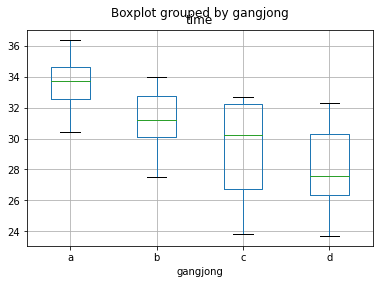

In [29]:
df.boxplot('time', by ='gangjong')

In [36]:
#ANOVA실행- 강종/2차정련 시간 
#statsmodels 라이브러리 사용

formula = 'time ~ C(gangjong)'
lm = ols(formula, df).fit()

print(anova_lm(lm))
print('결론 : 유의수준 5%에서 P값이 0.019이므로 강종별 2차정련 시간에 차이가 있다고 할 수 있다.')

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN
결론 : 유의수준 5%에서 P값이 0.019이므로 강종별 2차정련 시간에 차이가 있다고 할 수 있다.


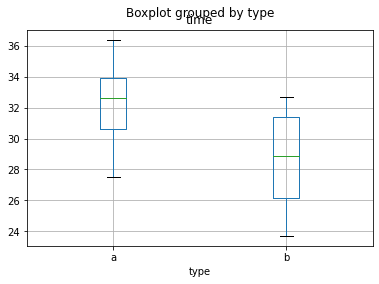

In [31]:
df.boxplot('time', by ='type')

In [35]:
#ANOVA실행- type/2차정련 시간
#statsmodels 라이브러리 사용

formula = 'time ~ C(type)'
lm = ols(formula, df).fit()

print(anova_lm(lm))
print('결론 : 유의수준 5%에서 P값이 0.005이므로 type별 2차정련 시간에 차이가 있다고 할 수 있다.')

            df      sum_sq    mean_sq         F   PR(>F)
C(type)    1.0   82.881667  82.881667  9.653816  0.00514
Residual  22.0  188.878333   8.585379       NaN      NaN
결론 : 유의수준 5%에서 P값이 0.005이므로 type별 2차정련 시간에 차이가 있다고 할 수 있다.


### [실습] 상관분석


In [56]:
df = pd.read_csv('/home/piai/Downloads/correlation.csv', engine = 'python')
df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


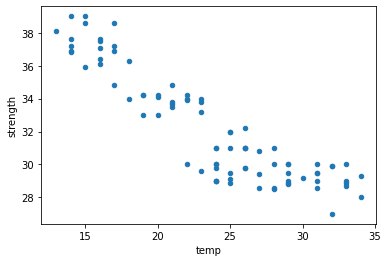

In [62]:
df.plot.scatter(x = 'temp', y ='strength') #y는 설명변수 x 는 종속변수

#강한 음의 상관관계를 가짐

In [66]:
# Correlation Analysis 실행

corr, pval = stats.pearsonr(df['temp'], df['strength'])

#correlation, p-value 결과 출력

print('Correlation Analysis')
print('corr: {0:0.3f}'.format(corr))
print('p-value: {0:0.3f}'.format(pval))
print()
print('결론 : 초코칩의 강도와 재료 반죽온도간에 "매우 강한 음의 상관성"이 있다고 할 수 있다.')

Correlation Analysis
corr: -0.899
p-value: 0.000

결론 : 초코칩의 강도와 재료 반죽온도간에 "매우 강한 음의 상관성"이 있다고 할 수 있다.


### 단순선형회귀

In [67]:
df = pd.read_csv('/home/piai/Downloads/correlation.csv', engine = 'python')
df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


양의 상관관계가 매우 강하게 보임


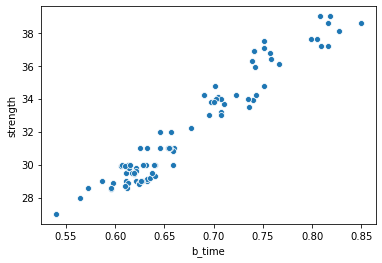

In [89]:
sns.scatterplot(data = df, x = 'b_time', y = 'strength')
print('양의 상관관계가 매우 강하게 보임')

In [95]:
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

formula = 'strength~b_time'
model = smf.ols(formula, data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.60e-51
Time:                        16:27:56   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.0

* 결론 : 회귀식은 Strength = 2.1 + 44.6*b_time   
* 위 회귀식의 설명력은 R-Sq = 93.3% 이다.  
  
* Omnibus가 0.077로 0.05보다 크므로 정규성을 띈다고 볼 수 있다.   
* Durbin-Watson 값은 1.395로 2에 가까우므로, 자기상관이 없다고 즉, 독립적이라 볼 수 있다.  

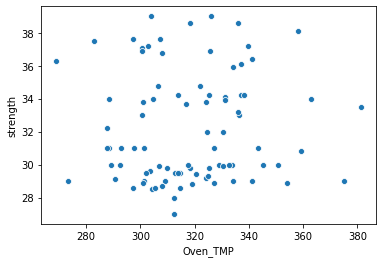

In [99]:
sns.scatterplot(data = df, x = 'Oven_TMP', y = 'strength')


In [100]:
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

formula = 'strength~Oven_TMP'
model = smf.ols(formula, data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1136
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.737
Time:                        17:06:42   Log-Likelihood:                -223.88
No. Observations:                  86   AIC:                             451.8
Df Residuals:                      84   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4190      5.271      5.771      0.0

* 결론 : 회귀식은 Strength = 30.4 +  0.0056*Oven_TMP   
* 위 회귀식의 설명력은 R-Sq = 0.1% 이다. 따라서 위 회귀식의 설명력은 매우 작다고 볼 수 있다.  
  
* Omnibus가 0.000로 0.05보다 작으므로 정규성을 따르고 있지 않으며,     
* Durbin-Watson 값은 0.175로 0에 가까우므로, 양의 자기상관을 가진다고 할 수 있다.  